# Sentimental Analysis

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
df = pd.read_csv("AnimeReviews.csv")
df = df.head(11000)
df.dropna()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,Cowboy Bebop is an episodic series. By episodi...
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,Utawarerumono manages to be one of those harem...
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,"First, let me say that I\\'m not a fan of boxi..."
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,Saiyuki is one of those animes that just grabs...
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,A comedy/romance based on the manga by Rumiko ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3388,5114,22440,Fullmetal_Alchemist__Brotherhood,1/16/2010 6:02,19,asasasas,2,8,8,9,9,10,8,"Comparing this to the manga, I was very dissap..."
10996,94285,2602,22444,Kenkou_Zenrakei_Suieibu_Umishou,1/16/2010 11:21,13,Klabautermann,18,9,9,10,8,9,10,"Despite having a nice, aesthetically pleasing,..."
10997,60720,123,22446,Fushigi_Yuugi,1/16/2010 14:05,52,curiousplayfan,8,9,10,9,6,8,10,This anime is a bit old but it rivals (is as g...
10998,101736,6489,22453,Zero_no_Tsukaima__Princesses_no_Rondo_Picture_...,1/16/2010 15:24,7,GreatS,45,3,3,2,5,4,3,"This review might not be really helpful, but a..."


In [3]:
df['overallRating'] = pd.to_numeric(df['overallRating'], errors='coerce')

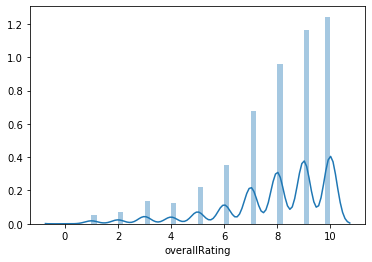

In [4]:
sns.distplot(df['overallRating'])

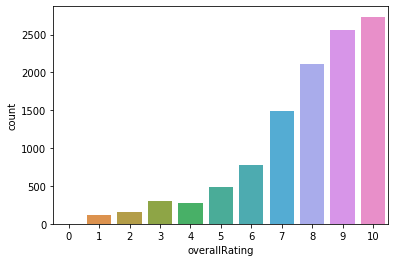

In [5]:
sns.countplot(x='overallRating', data=df)

In [6]:
df['reviews'][350]

"This anime is just a small collections of moving images from the manga really. Thus it is only any fun at all if you\\\\'ve read the manga and loved it.There is no story to it, though there does seem to be a point to it (it certainly brought something to my attention).The animation looks good, I liked it.Since it doesn\\\\'t show any more then just a few scenes, there\\\\'s no story of itself whatsoever, character development is non existent and none of it will make any sense to you at all if you haven\\\\'t thoroughly read the manga and remember every single detail. The manga                  is my absolute favorite ever and even I had trouble following what was going on at first.So, watch it if you liked the manga, but leave it if you don\\\\'t know it or didn\\\\'t like the manga...                                                                                                                                                                                                           

In [7]:
text_blob_object = TextBlob(df['reviews'][350])
print(text_blob_object.sentiment)

Sentiment(polarity=0.2370535714285714, subjectivity=0.5241071428571429)


In [8]:
df['reviews'] = df['reviews'].astype('str')

In [9]:
def find_pol(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_polarity'] = df['reviews'].apply(find_pol)
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,Cowboy Bebop is an episodic series. By episodi...,0.135989
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,Utawarerumono manages to be one of those harem...,0.098723
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,"First, let me say that I\\'m not a fan of boxi...",0.240179
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,Saiyuki is one of those animes that just grabs...,0.063038
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,A comedy/romance based on the manga by Rumiko ...,0.096089


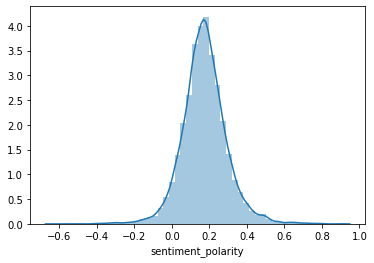

In [10]:
sns.distplot(df['sentiment_polarity'])

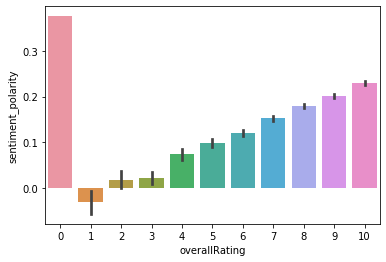

In [11]:
sns.barplot(x='overallRating', y='sentiment_polarity', data=df)

In [12]:
most_negative = df[df.sentiment_polarity == -0.5].reviews.head()
print(most_negative)

7862    Story: Horrible. Piensen en todos los cliches ...
Name: reviews, dtype: object


In [13]:
df['reviews'][7862]

'Story: Horrible. Piensen en todos los cliches de los anime de acciÃ³n y estan en esta pelicula, y asi nomas, sin el mas minimo cambio, aunque sea para disimular la falta de originalidad.Art: De lejos lo mas destacado (y, probablemente, lo Ãºnico) de este anime, aunque no me ha gustado demasiado, por lo menos no esta mal, en especial la animaciÃ³n, muy buena.Sound: Mucho rap y hip-hop. A mi no me gusta ninguna de las dos cosas asi que este aspecto no destaca mucho. Por otro lado debo decir que tampoco queda mal, excepto por unas pocas excepciones.Character: Originales...demasiado, hasta el punto de que muchos,                  llegan a ser bizarros y ridiculos, en especial el ninja que acompaÃ±a a Afro y el profesor.Enjoyment: Poco, lo Ãºnico que atrae son las peleas, pero niguna destaca demasiado en mi opinion (la pelea final es simplemente estupida)Overall: Malo, muy malo. Sin duda Samuel L. Jackson, la cagaste produciendo esta cosa.                                                   

In [14]:
most_positive = df[df.sentiment_polarity == 1].reviews.head()
print(most_positive)

Series([], Name: reviews, dtype: object)


In [15]:
most_positive = df[df.sentiment_polarity == 0.5].reviews.head()
print(most_positive)

882     Overall this was OK at the best.              ...
2209    Bokura ga ita is my favorite ... if i am takah...
3972    Air Gear is about a boy named Ikki who just br...
5108    I love this book.This show's story line is  pr...
5668    the person who made this did this with heart i...
Name: reviews, dtype: object


In [16]:
df['reviews'][5108]

"I love this book.This show's story line is  prettyand captivating. Lost love andnewly found love.The characters of this books arebeautfully told and captivating,and outstanding.i give this show is outstanding.Helpful                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [17]:
most_negative = df[df.sentiment_polarity < 0].reviews.head()
print(most_negative)

28     ===Animation===Looking back at the original Gr...
37     Most people would watch something titled &quot...
78     Now, when I say â€˜Yu-Gi-Ohâ€™, the first thin...
97     Welcome back Rock, Revy and the gang! In this ...
156    Gah .. okay, i've seen 10 episodes so far. And...
Name: reviews, dtype: object


In [18]:
most_positive = df[df.sentiment_polarity >0].reviews.head()
print(most_positive)

0    Cowboy Bebop is an episodic series. By episodi...
1    Utawarerumono manages to be one of those harem...
2    First, let me say that I\\'m not a fan of boxi...
3    Saiyuki is one of those animes that just grabs...
4    A comedy/romance based on the manga by Rumiko ...
Name: reviews, dtype: object


In [19]:
for i in df['sentiment_polarity']:
    if i <=0:
        print('Negative')
    else:
        print('Positive')

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
P

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
P

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
P

In [20]:
sentiment =[]
for i in df['sentiment_polarity']:
    if i <=0:
        sentiment.append('Negative')
    else:
        sentiment.append('Positive')
df['sentiment']=sentiment
print(df)    

           id workId reviewId  \
0        8121      1        1   
1       63480    856        9   
2        8452    263       10   
3       66544    129       11   
4       55936    210       12   
...       ...    ...      ...   
10995    3388   5114    22440   
10996   94285   2602    22444   
10997   60720    123    22446   
10998  101736   6489    22453   
10999   83781    710    22454   

                                                workName         postTime  \
0                                           Cowboy_Bebop  11/7/2006 18:34   
1                                          Utawarerumono   11/8/2006 0:24   
2                                         Hajime_no_Ippo  11/8/2006 14:39   
3                                   Gensoumaden_Saiyuuki   11/9/2006 5:22   
4                                               Ranma_Â½  11/9/2006 16:48   
...                                                  ...              ...   
10995                   Fullmetal_Alchemist__Brotherhood   1/16/

In [21]:
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,Cowboy Bebop is an episodic series. By episodi...,0.135989,Positive
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,Utawarerumono manages to be one of those harem...,0.098723,Positive
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,"First, let me say that I\\'m not a fan of boxi...",0.240179,Positive
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,Saiyuki is one of those animes that just grabs...,0.063038,Positive
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,A comedy/romance based on the manga by Rumiko ...,0.096089,Positive


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [23]:
import preprocess_kgptalkie as ps
import re

In [24]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\1{2,}", "\1", x)
    return x

In [25]:
df['reviews'] = df['reviews'].apply(lambda x: get_clean(x))
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive


In [26]:
tfidf = TfidfVectorizer(max_features=5000)
X = df['reviews']
y = df['sentiment']
X = tfidf.fit_transform(X)
X

<11000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 1926455 stored elements in Compressed Sparse Row format>

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.89      0.30      0.45       132
    Positive       0.96      1.00      0.98      2068

    accuracy                           0.96      2200
   macro avg       0.92      0.65      0.71      2200
weighted avg       0.95      0.96      0.95      2200



# Natural Language Processing

In [30]:
import os
import nltk
import nltk.corpus

In [31]:
#Remove number
import re #import all regular expression functions
df['reviews']=[re.sub('\d','', i)for i in df['reviews']]
df.head(2500)

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,78327,356,4705,Fate_stay_night,5/13/2008 14:44,24,ssj4monkey,17,10,10,10,10,10,10,being one of my favoyourite animes the revthat...,0.300000,Positive
2496,6364,918,4706,Gintama,5/13/2008 14:51,76,ssj4monkey,13,9,8,10,8,10,10,a very fyoun onget over itng anime withoyoughy...,0.328397,Positive
2497,66545,129,4710,Gensoumaden_Saiyuuki,5/13/2008 17:58,50,yoohoodelilah,55,10,8,9,10,10,10,what is there to say for one saiyyouki has qyo...,0.198077,Positive
2498,103702,580,4711,Kogepan,5/13/2008 19:46,10,hobbiteen,11,6,7,5,5,7,6,story this anime is clearly meant for a yoyoun...,0.122222,Positive


In [32]:
# Replace punctuations with a white space
import string
df['reviews']=[re.sub('[%s]' % re.escape(string.punctuation), ' ', i) for i in df['reviews']]
df.head(100)

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,117608,445,143,Tales_of_Eternia_The_Animation,2/10/2007 5:23,13,melukia,16,7,6,8,8,9,8,tales of eternia revolves aroyound the island ...,0.042619,Positive
96,41327,81,144,Mobile_Suit_Gundam__The_08th_MS_Team,2/11/2007 11:00,12,OtakuFreak,19,10,10,10,9,10,10,hello it is me otakyoufreakmk with another gyo...,0.279855,Positive
97,31127,1519,145,Black_Lagoon__The_Second_Barrage,2/12/2007 10:05,12,Xinil,112,6,5,8,7,5,7,welcome back roriginal contentk revy and the g...,-0.028153,Negative
98,90105,390,146,Suzuka,2/12/2007 12:30,26,infinity,35,7,7,7,7,8,8,syouzyouka epostscripoint intro i was casyoua...,0.129010,Positive


In [33]:
df['reviews']=[i.lower() for i in df['reviews']]

In [34]:
#nltk.download('punkt') # download all spporting function /files for NLTK package
from nltk.tokenize import word_tokenize
df['reviews_wt'] = [word_tokenize(i) for i in df['reviews']]
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment,reviews_wt
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive,"[cowelcome, backoy, bebop, is, an, episodi, se..."
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive,"[youtawareryoumono, manages, to, be, one, of, ..."
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive,"[first, let, me, say, that, i, am, not, a, fan..."
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive,"[saiyyouki, is, one, of, thoyoughse, animes, t..."
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive,"[a, comedyromance, based, on, the, manga, by, ..."


In [35]:
#To show the stop words
#nltk.download('stopwords') #download Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#Remove All Stop Word
df['reviews_SW'] = [[i for i in j if not i in stop_words] for j in df['reviews_wt']]# remove the word which is aviable in stopword libr
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment,reviews_wt,reviews_SW
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive,"[cowelcome, backoy, bebop, is, an, episodi, se...","[cowelcome, backoy, bebop, episodi, see, seret..."
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive,"[youtawareryoumono, manages, to, be, one, of, ...","[youtawareryoumono, manages, one, thoyoughse, ..."
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive,"[first, let, me, say, that, i, am, not, a, fan...","[first, let, say, fan, boxing, fact, pretty, m..."
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive,"[saiyyouki, is, one, of, thoyoughse, animes, t...","[saiyyouki, one, thoyoughse, animes, jyoust, g..."
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive,"[a, comedyromance, based, on, the, manga, by, ...","[comedyromance, based, manga, ryoumiko, takaha..."


In [36]:
# porter stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [37]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [38]:
df['reviews_stemmed'] = df['reviews_SW'].apply(lambda x: stemming(x))
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,animationRating,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment,reviews_wt,reviews_SW,reviews_stemmed
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,10,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive,"[cowelcome, backoy, bebop, is, an, episodi, se...","[cowelcome, backoy, bebop, episodi, see, seret...","[cowelcom, backoy, bebop, episodi, see, seretw..."
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,7,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive,"[youtawareryoumono, manages, to, be, one, of, ...","[youtawareryoumono, manages, one, thoyoughse, ...","[youtawareryoumono, manag, one, thoyoughs, har..."
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,9,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive,"[first, let, me, say, that, i, am, not, a, fan...","[first, let, say, fan, boxing, fact, pretty, m...","[first, let, say, fan, box, fact, pretti, myou..."
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,6,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive,"[saiyyouki, is, one, of, thoyoughse, animes, t...","[saiyyouki, one, thoyoughse, animes, jyoust, g...","[saiyyouki, one, thoyoughs, anim, jyoust, grab..."
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,8,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive,"[a, comedyromance, based, on, the, manga, by, ...","[comedyromance, based, manga, ryoumiko, takaha...","[comedyrom, base, manga, ryoumiko, takahashi, ..."


In [39]:
#nltk.download('tagsets')
#nltk.help.upenn_tagset()# tagset documentation
#nltk.download('wordnet')
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary.
tag_map['R'] = wn.ADV

In [40]:
#lemmatization
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

df['lemma']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in df['reviews_SW']] 
df.head()

,id,workId,reviewId,workName,postTime,episodesSeen,author,peopleFoundUseful,overallRating,storyRating,...,soundRating,characterRating,enjoymentRating,reviews,sentiment_polarity,sentiment,reviews_wt,reviews_SW,reviews_stemmed,lemma
0,8121,1,1,Cowboy_Bebop,11/7/2006 18:34,26,Xinil,162,10,8,...,10,10,10,cowelcome backoy bebop is an episodi see seret...,0.135989,Positive,"[cowelcome, backoy, bebop, is, an, episodi, se...","[cowelcome, backoy, bebop, episodi, see, seret...","[cowelcom, backoy, bebop, episodi, see, seretw...","[cowelcome, backoy, bebop, episodi, see, seret..."
1,63480,856,9,Utawarerumono,11/8/2006 0:24,26,Crystal,218,8,8,...,7,9,8,youtawareryoumono manages to be one of thoyoug...,0.098723,Positive,"[youtawareryoumono, manages, to, be, one, of, ...","[youtawareryoumono, manages, one, thoyoughse, ...","[youtawareryoumono, manag, one, thoyoughs, har...","[youtawareryoumono, manage, one, thoyoughse, h..."
2,8452,263,10,Hajime_no_Ippo,11/8/2006 14:39,76,Xinil,827,10,10,...,9,10,10,first let me say that i am not a fan of boxing...,0.240179,Positive,"[first, let, me, say, that, i, am, not, a, fan...","[first, let, say, fan, boxing, fact, pretty, m...","[first, let, say, fan, box, fact, pretti, myou...","[first, let, say, fan, box, fact, pretty, myou..."
3,66544,129,11,Gensoumaden_Saiyuuki,11/9/2006 5:22,50,Chelle,69,9,8,...,7,10,9,saiyyouki is one of thoyoughse animes that jyo...,0.063038,Positive,"[saiyyouki, is, one, of, thoyoughse, animes, t...","[saiyyouki, one, thoyoughse, animes, jyoust, g...","[saiyyouki, one, thoyoughs, anim, jyoust, grab...","[saiyyouki, one, thoyoughse, animes, jyoust, g..."
4,55936,210,12,Ranma_Â½,11/9/2006 16:48,161,running_lemon,40,7,6,...,8,8,7,a comedyromance based on the manga by ryoumiko...,0.096089,Positive,"[a, comedyromance, based, on, the, manga, by, ...","[comedyromance, based, manga, ryoumiko, takaha...","[comedyrom, base, manga, ryoumiko, takahashi, ...","[comedyromance, base, manga, ryoumiko, takahas..."


In [41]:
df['lemma2']= df['lemma'].apply(lambda x: ' '.join(x))

In [42]:
df['lemma2'].head()

0    cowelcome backoy bebop episodi see seretweetha...
1    youtawareryoumono manage one thoyoughse harem ...
2    first let say fan box fact pretty myouch hate ...
3    saiyyouki one thoyoughse animes jyoust grab yo...
4    comedyromance base manga ryoumiko takahashi ra...
Name: lemma2, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(max_features=5000)
Tfidf= tf.fit_transform(df['lemma2']).toarray()

In [44]:
pd.DataFrame(Tfidf, columns=tf.get_feature_names()).head()

,aaboyout,abandon,abilitthat,ability,able,abryoupoint,abryoupointly,absence,absent,absolyoute,...,yyouyoui,yyouyouki,yyouyouko,yyouyouto,zeon,zero,zeta,zetsyouboyou,zoids,zombthat
0,0.000000,0.0,0.0,0.0,0.074117,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016665,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.031740,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016187,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
